C:\Users\Nazia\AppData\Local\Temp\ipykernel_18876\2606282297.py:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  numeric_resampled = numeric_columns.resample('M').mean()


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 245.390
Date:                            Mon, 16 Dec 2024   AIC                           -480.780
Time:                                    20:47:17   BIC                           -465.965
Sample:                                01-31-2012   HQIC                          -474.760
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2637      0.115      2.291      0.022       0.038       0.489
ma.L1         -0.8301      0.076   

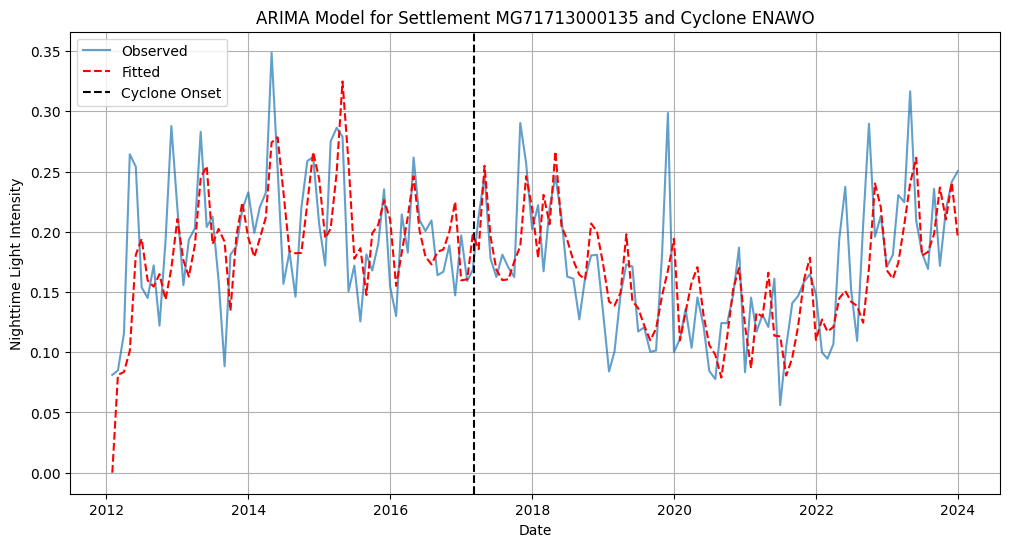

In [31]:
# import pandas as pd
# import geopandas as gpd
# import matplotlib.pyplot as plt
# from pmdarima.arima import auto_arima
# from concurrent.futures import ThreadPoolExecutor, TimeoutError

# # Path to your data directory
# belmontdir = "C:/Users/Nazia/Documents/OSU/Belmont/PlotData/"
# doyNTL_allgrid3 = "allNTL_allgrid3_props.csv"  # GAP-FILLED data file

# # Load and preprocess the settlement data
# df = pd.read_csv(belmontdir + doyNTL_allgrid3)
# df['YYYY_MM_DD'] = pd.to_datetime(df['YYYY_MM_DD'], errors='coerce')
# df.set_index('YYYY_MM_DD', inplace=True)

# # Validate and clean the NTLmean column
# df['NTLmean'] = pd.to_numeric(df['NTLmean'], errors='coerce')
# df['NTLmean'] = df['NTLmean'].fillna(0)

# # Load and preprocess the cyclone track data
# cyclone_track_gdf = gpd.read_file(belmontdir + "merged_jtwc_updated.shp")
# landfall_df = cyclone_track_gdf[['constant', 'datetime']].rename(
#     columns={'constant': 'Cyclone', 'datetime': 'Landfall_DateTime'}
# )
# landfall_df['Landfall_DateTime'] = pd.to_datetime(landfall_df['Landfall_DateTime'])
# landfall_df['Cyclone'] = landfall_df['Cyclone'].str.upper()

# # Select the cyclone and settlement of interest
# cyclone_name = 'ENAWO'
# grid3 = 'MG71713000135'

# # Filter cyclone landfall date
# try:
#     cyclone_onset = landfall_df.loc[landfall_df['Cyclone'] == cyclone_name, 'Landfall_DateTime'].iloc[0]
# except IndexError:
#     print(f"Cyclone {cyclone_name} not found in the dataset.")
#     exit()

# # Add ITS variables to the dataset
# df['Step'] = (df.index >= cyclone_onset).astype(int)
# df['Ramp'] = (df.index - cyclone_onset).days
# df['Ramp'] = df['Ramp'].clip(lower=0)  # Clip negative values to 0

# # Filter data for the specific settlement
# its_data = df[df['settl_pcod'] == grid3]

# # Separate non-numeric columns to merge later
# non_numeric_columns = its_data.select_dtypes(exclude=['float64', 'int64'])

# # Downsample numeric data to monthly frequency
# numeric_columns = its_data.select_dtypes(include=['float64', 'int64'])
# numeric_resampled = numeric_columns.resample('M').mean()

# # Merge back non-numeric columns (if needed)
# its_data = numeric_resampled.join(non_numeric_columns, how='left')

# # Adjust seasonal period for monthly data
# seasonal_period = 12

# # Fit ARIMA model for the settlement and cyclone
# def fit_arima():
#     return auto_arima(
#         its_data['NTLmean'],
#         seasonal=True,
#         m=seasonal_period,
#         exogenous=its_data[['Step', 'Ramp']],
#         stepwise=True,
#         max_order=5,  # Total complexity limit
#         start_p=0, max_p=1,  # Ensure max_p >= start_p
#         start_q=0, max_q=1,  # Ensure max_q >= start_q
#         start_P=0, max_P=1,  # Ensure max_P >= start_P
#         start_Q=0, max_Q=1   # Ensure max_Q >= start_Q
#     )

# model = None
# with ThreadPoolExecutor() as executor:
#     future = executor.submit(fit_arima)
#     try:
#         model = future.result(timeout=300)  # Timeout set to 5 minutes
#     except TimeoutError:
#         print("ARIMA fitting timed out.")
#     except ValueError as e:
#         print(f"ARIMA fitting error: {e}")

# if model:
#     # Print the best model summary
#     print(model.summary())

#     # Add fitted values to the DataFrame
#     its_data['Fitted'] = model.predict_in_sample(exogenous=its_data[['Step', 'Ramp']])

#     # Plot observed vs. fitted values
#     plt.figure(figsize=(12, 6))
#     plt.plot(its_data.index, its_data['NTLmean'], label='Observed', alpha=0.7)
#     plt.plot(its_data.index, its_data['Fitted'], label='Fitted', linestyle='--', color='red')
#     plt.axvline(cyclone_onset, color='black', linestyle='--', label='Cyclone Onset')
#     plt.title(f"ARIMA Model for Settlement {grid3} and Cyclone {cyclone_name}")
#     plt.xlabel("Date")
#     plt.ylabel("Nighttime Light Intensity")
#     plt.legend()
#     plt.grid(True)
#     plt.show()
# else:
#     print("No model was fitted due to timeout or errors.")



                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                 245.855
Date:                              Tue, 17 Dec 2024   AIC                           -481.709
Time:                                      13:03:41   BIC                           -466.895
Sample:                                  01-01-2012   HQIC                          -475.689
                                       - 12-01-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5722      0.078     -7.299      0.000      -0.726      -0.419
ma.L2         -0.19

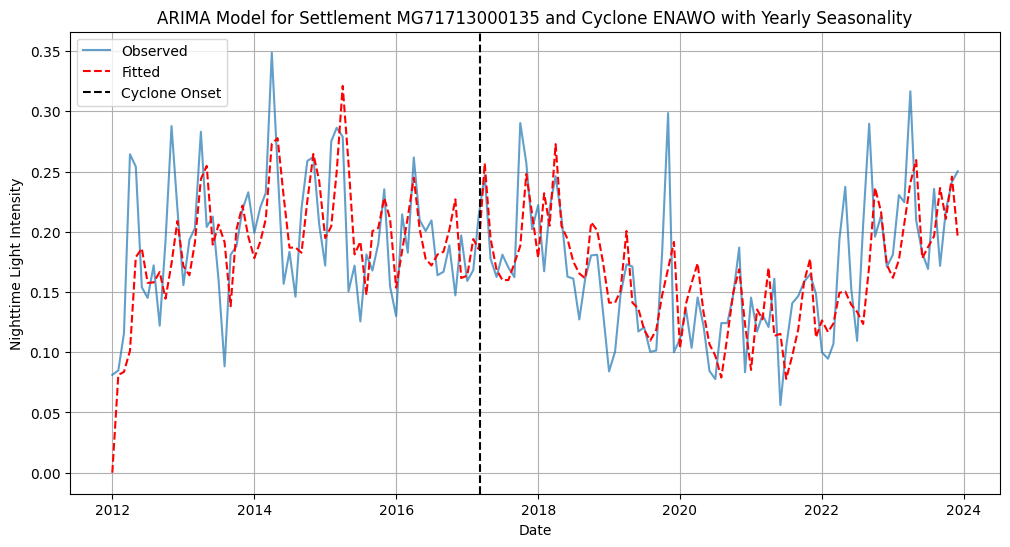

In [36]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from concurrent.futures import ThreadPoolExecutor, TimeoutError

# Path to your data directory
belmontdir = "C:/Users/Nazia/Documents/OSU/Belmont/PlotData/"
doyNTL_allgrid3 = "allNTL_allgrid3_props.csv"  # GAP-FILLED data file

# Load and preprocess the settlement data
df = pd.read_csv(belmontdir + doyNTL_allgrid3)
df['YYYY_MM_DD'] = pd.to_datetime(df['YYYY_MM_DD'], errors='coerce')
df.set_index('YYYY_MM_DD', inplace=True)

# Validate and clean the NTLmean column
df['NTLmean'] = pd.to_numeric(df['NTLmean'], errors='coerce')
df['NTLmean'] = df['NTLmean'].fillna(0)

# Load and preprocess the cyclone track data
cyclone_track_gdf = gpd.read_file(belmontdir + "merged_jtwc_updated.shp")
landfall_df = cyclone_track_gdf[['constant', 'datetime']].rename(
    columns={'constant': 'Cyclone', 'datetime': 'Landfall_DateTime'}
)
landfall_df['Landfall_DateTime'] = pd.to_datetime(landfall_df['Landfall_DateTime'])
landfall_df['Cyclone'] = landfall_df['Cyclone'].str.upper()

# Select the cyclone and settlement of interest
cyclone_name = 'ENAWO'
grid3 = 'MG71713000135'

# Filter cyclone landfall date
try:
    cyclone_onset = landfall_df.loc[landfall_df['Cyclone'] == cyclone_name, 'Landfall_DateTime'].iloc[0]
except IndexError:
    print(f"Cyclone {cyclone_name} not found in the dataset.")
    exit()

# Add ITS variables to the dataset
df['Step'] = (df.index >= cyclone_onset).astype(int)
df['Ramp'] = (df.index - cyclone_onset).days
df['Ramp'] = df['Ramp'].clip(lower=0)  # Clip negative values to 0

# Filter data for the specific settlement
its_data = df[df['settl_pcod'] == grid3]

# Ensure at least two years of data for yearly seasonality
start_date = its_data.index.min()
end_date = its_data.index.max()

if (end_date - start_date).days < 730:  # Less than 2 years of data
    print("Insufficient data for yearly seasonality. Extend the data range.")
    exit()

# Downsample numeric data to monthly frequency
numeric_columns = its_data[['NTLmean']]  # Only resample the NTLmean column
numeric_resampled = numeric_columns.resample('MS').mean()  # Monthly start frequency

# Recalculate or align Step and Ramp with resampled index
numeric_resampled['Step'] = (numeric_resampled.index >= cyclone_onset).astype(int)
numeric_resampled['Ramp'] = (numeric_resampled.index - cyclone_onset).days
numeric_resampled['Ramp'] = numeric_resampled['Ramp'].clip(lower=0)

# Adjust seasonal period for yearly seasonality
seasonal_period = 12  # Annual seasonality for monthly data

# Fit ARIMA model for the settlement and cyclone
def fit_arima():
    return auto_arima(
        numeric_resampled['NTLmean'],
        seasonal=True,
        m=seasonal_period,
        exogenous=numeric_resampled[['Step', 'Ramp']],
        stepwise=True,
        max_order=10,  # Increase search space for better seasonal fit
        start_p=0, max_p=2,  # Start with small values
        start_q=0, max_q=2,
        start_P=0, max_P=2,
        start_Q=0, max_Q=2
    )

model = None
with ThreadPoolExecutor() as executor:
    future = executor.submit(fit_arima)
    try:
        model = future.result(timeout=300)  # Timeout set to 5 minutes
    except TimeoutError:
        print("ARIMA fitting timed out.")
    except ValueError as e:
        print(f"ARIMA fitting error: {e}")

if model:
    # Print the best model summary
    print(model.summary())

    # Add fitted values to the DataFrame
    numeric_resampled['Fitted'] = model.predict_in_sample(exogenous=numeric_resampled[['Step', 'Ramp']])

    # Plot observed vs. fitted values
    plt.figure(figsize=(12, 6))
    plt.plot(numeric_resampled.index, numeric_resampled['NTLmean'], label='Observed', alpha=0.7)
    plt.plot(numeric_resampled.index, numeric_resampled['Fitted'], label='Fitted', linestyle='--', color='red')
    plt.axvline(cyclone_onset, color='black', linestyle='--', label='Cyclone Onset')
    plt.title(f"ARIMA Model for Settlement {grid3} and Cyclone {cyclone_name} with Yearly Seasonality")
    plt.xlabel("Date")
    plt.ylabel("Nighttime Light Intensity")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No model was fitted due to timeout or errors.")


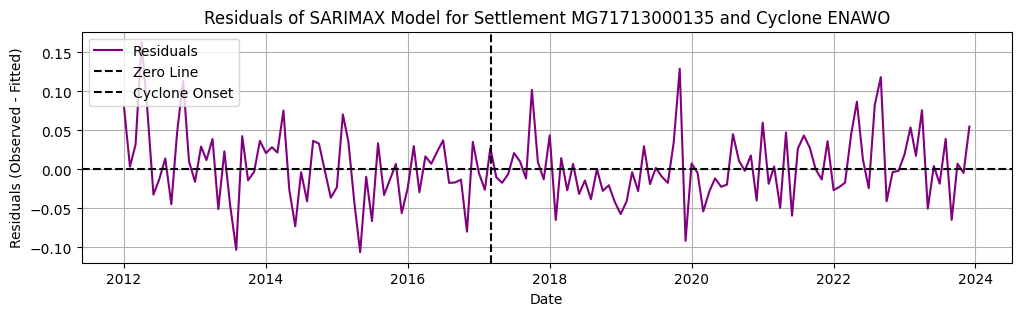

In [37]:
import matplotlib.pyplot as plt

# Calculate residuals: Observed - Fitted
numeric_resampled['Residuals'] = numeric_resampled['NTLmean'] - numeric_resampled['Fitted']

# Plot the residuals
plt.figure(figsize=(12, 3))
plt.plot(numeric_resampled.index, numeric_resampled['Residuals'], color='purple', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Line')
plt.axvline(cyclone_onset, color='black', linestyle='--', label='Cyclone Onset')
plt.title(f"Residuals of SARIMAX Model for Settlement {grid3} and Cyclone {cyclone_name}")
plt.xlabel("Date")
plt.ylabel("Residuals (Observed - Fitted)")
plt.legend()
plt.grid(True)
plt.show()


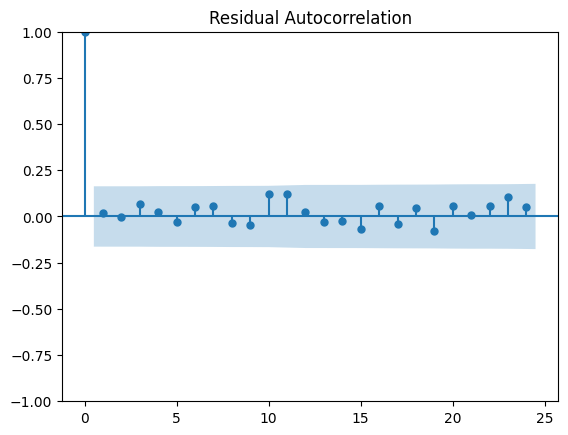

In [38]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(model.resid(), lags=24)
plt.title("Residual Autocorrelation")
plt.show()


In [39]:
observed = numeric_resampled['NTLmean']
fitted = numeric_resampled['Fitted']
diff = (observed - fitted).mean()
print(f"Mean difference (Observed - Fitted): {diff}")


Mean difference (Observed - Fitted): 0.002614033308095738


### Weekly

C:\Users\Nazia\AppData\Local\Temp\ipykernel_18876\871104306.py:60: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numeric_resampled['NTLmean'] = numeric_resampled['NTLmean'].interpolate(method='linear').fillna(method='bfill')


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  624
Model:               SARIMAX(1, 1, 2)   Log Likelihood                 809.578
Date:                Tue, 17 Dec 2024   AIC                          -1611.157
Time:                        12:48:56   BIC                          -1593.418
Sample:                    01-23-2012   HQIC                         -1604.263
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7238      0.072     10.085      0.000       0.583       0.864
ma.L1         -1.3783      0.093    -14.839      0.000      -1.560      -1.196
ma.L2          0.3939      0.088      4.498      0.0

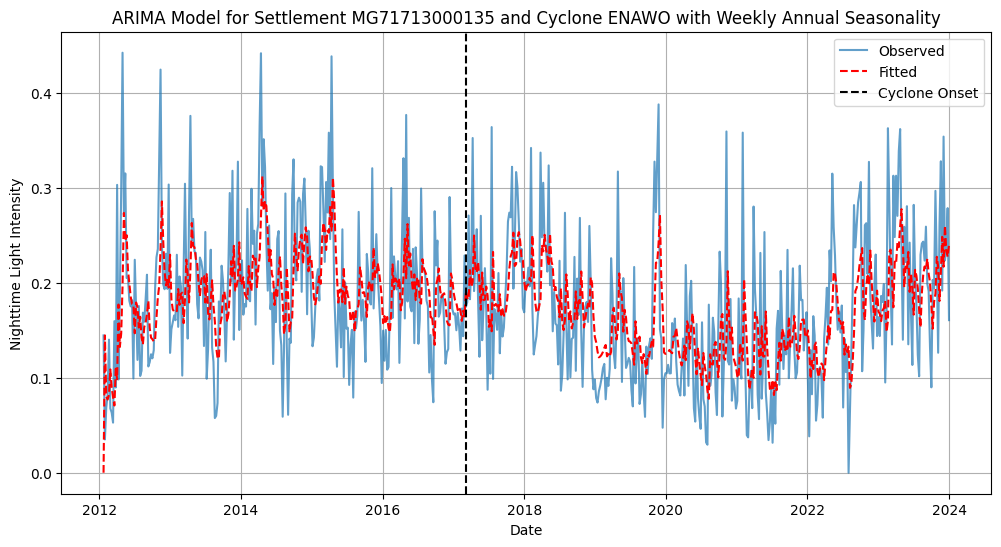

In [34]:
# import pandas as pd
# import geopandas as gpd
# import matplotlib.pyplot as plt
# from pmdarima.arima import auto_arima
# from concurrent.futures import ThreadPoolExecutor, TimeoutError

# # Path to your data directory
# belmontdir = "C:/Users/Nazia/Documents/OSU/Belmont/PlotData/"
# doyNTL_allgrid3 = "allNTL_allgrid3_props.csv"  # GAP-FILLED data file

# # Load and preprocess the settlement data
# df = pd.read_csv(belmontdir + doyNTL_allgrid3)
# df['YYYY_MM_DD'] = pd.to_datetime(df['YYYY_MM_DD'], errors='coerce')
# df.set_index('YYYY_MM_DD', inplace=True)

# # Validate and clean the NTLmean column
# df['NTLmean'] = pd.to_numeric(df['NTLmean'], errors='coerce')
# df['NTLmean'] = df['NTLmean'].fillna(0)

# # Load and preprocess the cyclone track data
# cyclone_track_gdf = gpd.read_file(belmontdir + "merged_jtwc_updated.shp")
# landfall_df = cyclone_track_gdf[['constant', 'datetime']].rename(
#     columns={'constant': 'Cyclone', 'datetime': 'Landfall_DateTime'}
# )
# landfall_df['Landfall_DateTime'] = pd.to_datetime(landfall_df['Landfall_DateTime'])
# landfall_df['Cyclone'] = landfall_df['Cyclone'].str.upper()

# # Select the cyclone and settlement of interest
# cyclone_name = 'ENAWO'
# grid3 = 'MG71713000135'

# # Filter cyclone landfall date
# try:
#     cyclone_onset = landfall_df.loc[landfall_df['Cyclone'] == cyclone_name, 'Landfall_DateTime'].iloc[0]
# except IndexError:
#     print(f"Cyclone {cyclone_name} not found in the dataset.")
#     exit()

# # Add ITS variables to the dataset
# df['Step'] = (df.index >= cyclone_onset).astype(int)
# df['Ramp'] = (df.index - cyclone_onset).days
# df['Ramp'] = df['Ramp'].clip(lower=0)  # Clip negative values to 0

# # Filter data for the specific settlement
# its_data = df[df['settl_pcod'] == grid3]

# # Ensure at least two years of data for yearly seasonality
# start_date = its_data.index.min()
# end_date = its_data.index.max()

# if (end_date - start_date).days < 730:  # Less than 2 years of data
#     print("Insufficient data for yearly seasonality. Extend the data range.")
#     exit()

# # Downsample numeric data to weekly frequency
# numeric_columns = its_data[['NTLmean']]  # Only resample the NTLmean column
# numeric_resampled = numeric_columns.resample('W-MON').mean()  # Weekly frequency, starting Mondays

# # Handle NaN values after resampling
# numeric_resampled['NTLmean'] = numeric_resampled['NTLmean'].interpolate(method='linear').fillna(method='bfill')

# # Recalculate or align Step and Ramp with resampled index
# numeric_resampled['Step'] = (numeric_resampled.index >= cyclone_onset).astype(int)
# numeric_resampled['Ramp'] = (numeric_resampled.index - cyclone_onset).days
# numeric_resampled['Ramp'] = numeric_resampled['Ramp'].clip(lower=0)


# # Adjust seasonal period for weekly data (annual seasonality)
# seasonal_period = 52  # Annual seasonality for weekly data

# # Fit ARIMA model for the settlement and cyclone
# def fit_arima():
#     return auto_arima(
#         numeric_resampled['NTLmean'],
#         seasonal=True,
#         m=seasonal_period,
#         exogenous=numeric_resampled[['Step', 'Ramp']],
#         stepwise=True,
#         max_order=10,  # Increase search space for better seasonal fit
#         start_p=0, max_p=2,  # Start with small values
#         start_q=0, max_q=2,
#         start_P=0, max_P=2,
#         start_Q=0, max_Q=2
#     )

# model = None
# with ThreadPoolExecutor() as executor:
#     future = executor.submit(fit_arima)
#     try:
#         model = future.result(timeout=3000)  # Timeout set to 50 minutes
#     except TimeoutError:
#         print("ARIMA fitting timed out.")
#     except ValueError as e:
#         print(f"ARIMA fitting error: {e}")

# if model:
#     # Print the best model summary
#     print(model.summary())

#     # Add fitted values to the DataFrame
#     numeric_resampled['Fitted'] = model.predict_in_sample(exogenous=numeric_resampled[['Step', 'Ramp']])

#     # Plot observed vs. fitted values
#     plt.figure(figsize=(12, 6))
#     plt.plot(numeric_resampled.index, numeric_resampled['NTLmean'], label='Observed', alpha=0.7)
#     plt.plot(numeric_resampled.index, numeric_resampled['Fitted'], label='Fitted', linestyle='--', color='red')
#     plt.axvline(cyclone_onset, color='black', linestyle='--', label='Cyclone Onset')
#     plt.title(f"ARIMA Model for Settlement {grid3} and Cyclone {cyclone_name} with Weekly Annual Seasonality")
#     plt.xlabel("Date")
#     plt.ylabel("Nighttime Light Intensity")
#     plt.legend()
#     plt.grid(True)
#     plt.show()
# else:
#     print("No model was fitted due to timeout or errors.")


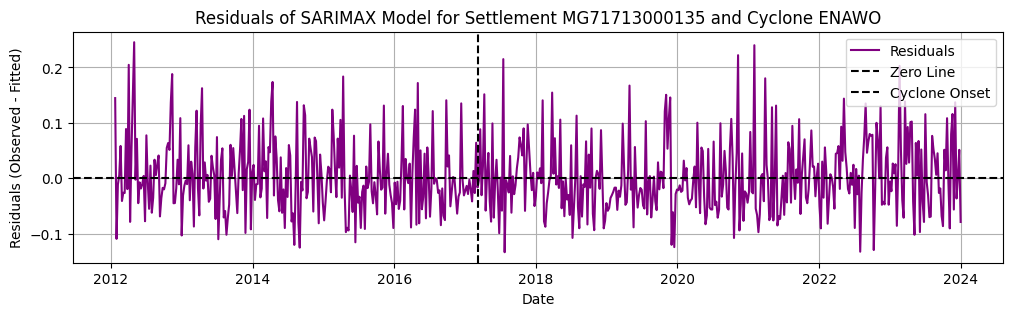

In [35]:
# import matplotlib.pyplot as plt

# # Calculate residuals: Observed - Fitted
# numeric_resampled['Residuals'] = numeric_resampled['NTLmean'] - numeric_resampled['Fitted']

# # Plot the residuals
# plt.figure(figsize=(12, 3))
# plt.plot(numeric_resampled.index, numeric_resampled['Residuals'], color='purple', label='Residuals')
# plt.axhline(y=0, color='black', linestyle='--', label='Zero Line')
# plt.axvline(cyclone_onset, color='black', linestyle='--', label='Cyclone Onset')
# plt.title(f"Residuals of SARIMAX Model for Settlement {grid3} and Cyclone {cyclone_name}")
# plt.xlabel("Date")
# plt.ylabel("Residuals (Observed - Fitted)")
# plt.legend()
# plt.grid(True)
# plt.show()


In [90]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
import numpy as np
from concurrent.futures import ThreadPoolExecutor, TimeoutError

# Path to your data directory
belmontdir = "C:/Users/Nazia/Documents/OSU/Belmont/PlotData/"
doyNTL_allgrid3 = "allNTL_allgrid3_props.csv"  # GAP-FILLED data file

# Load and preprocess the settlement data
df = pd.read_csv(belmontdir + doyNTL_allgrid3)
df['YYYY_MM_DD'] = pd.to_datetime(df['YYYY_MM_DD'], errors='coerce')
df.set_index('YYYY_MM_DD', inplace=True)

# Validate and clean the NTLmean column
df['NTLmean'] = pd.to_numeric(df['NTLmean'], errors='coerce')
df['NTLmean'] = df['NTLmean'].fillna(0)

# Load and preprocess the cyclone track data
cyclone_track_gdf = gpd.read_file(belmontdir + "merged_jtwc_updated.shp")
landfall_df = cyclone_track_gdf[['constant', 'datetime']].rename(
    columns={'constant': 'Cyclone', 'datetime': 'Landfall_DateTime'}
)
landfall_df['Landfall_DateTime'] = pd.to_datetime(landfall_df['Landfall_DateTime'])
landfall_df['Cyclone'] = landfall_df['Cyclone'].str.upper()

# Cyclone of interest
cyclone_name = 'ENAWO'

# Settlement list
settlements = [
    "MG71717000247", "MG71718000051", "MG71718000049", "MG71000000001",
    "MG71713000207", "MG71713000173", "MG71713000089", "MG44417000001",
    "MG71713000135"
]

# Filter cyclone landfall date
try:
    cyclone_onset = landfall_df.loc[landfall_df['Cyclone'] == cyclone_name, 'Landfall_DateTime'].iloc[0]
    cyclone_onset = cyclone_onset + pd.offsets.MonthBegin(0)  # Align to month start
except IndexError:
    print(f"Cyclone {cyclone_name} not found in the dataset.")
    exit()

In [91]:
# def fit_arima_for_settlement(its_data):
#     seasonal_period = 12  # Yearly seasonality
#     numeric_resampled = its_data[['NTLmean']].resample('MS').mean()
#     numeric_resampled['Step'] = (numeric_resampled.index >= cyclone_onset).astype(int)
#     numeric_resampled['Ramp'] = ((numeric_resampled.index - cyclone_onset).days).to_series().clip(lower=0)

#     try:
#         model = auto_arima(
#             numeric_resampled['NTLmean'],
#             seasonal=True,
#             m=seasonal_period,
#             exogenous=numeric_resampled[['Step', 'Ramp']],
#             stepwise=True,
#             max_order=10,
#             start_p=0, max_p=2,
#             start_q=0, max_q=2,
#             start_P=0, max_P=2,
#             start_Q=0, max_Q=2
#         )
#         numeric_resampled['Fitted'] = model.predict_in_sample(exogenous=numeric_resampled[['Step', 'Ramp']])
        
#         # Extract coefficients from statsmodels ARIMA result
#         arima_res = model.arima_res_  # Access the underlying fitted statsmodels ARIMA
#         params = arima_res.params  # Get all model parameters
        
#         # Extract Step and Ramp coefficients
#         step_coefs = params.get('x1', None)  # 'Step' corresponds to x1
#         ramp_coefs = params.get('x2', None)  # 'Ramp' corresponds to x2
        
#         return numeric_resampled, model, step_coefs, ramp_coefs
#     except Exception as e:
#         print(f"Error fitting ARIMA model: {e}")
#         return None, None, None, None


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-415.826, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-440.467, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-455.514, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-417.761, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-441.207, Time=0.10 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-476.787, Time=0.58 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-465.115, Time=0.44 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-472.893, Time=1.52 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-474.454, Time=1.81 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-465.679, Time=1.34 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-473.164, Time=1.68 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=-471.645, Time=1.99 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-439.133, Time=0.47 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-472.161, Time=0.65 sec
 ARIMA(0,1,2)(1,0,1

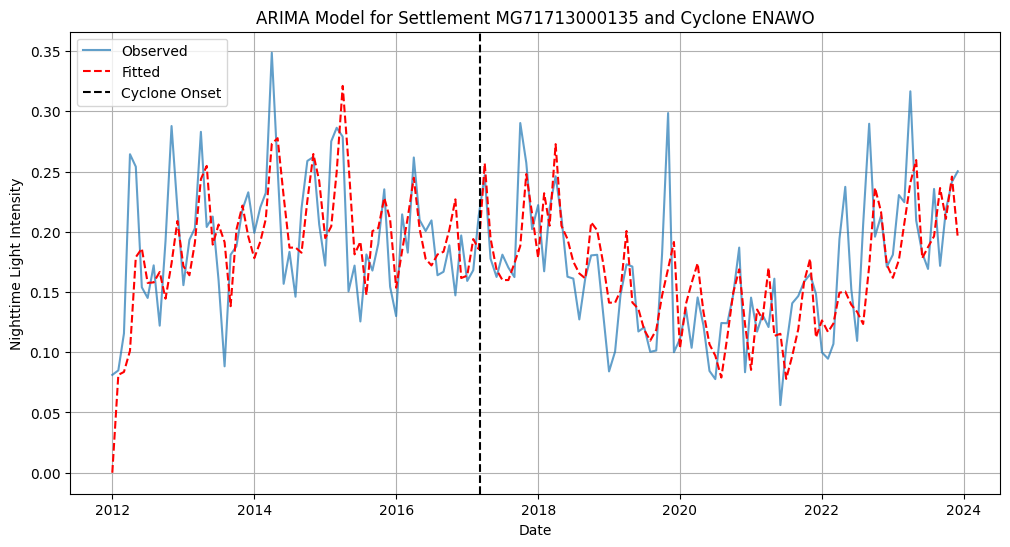

In [2]:
# Adjust seasonal period for yearly seasonality
seasonal_period = 12  # Annual seasonality for monthly data

# Define the ARIMA fitting function
def fit_arima():
    return auto_arima(
        numeric_resampled['NTLmean'],
        exogenous=numeric_resampled[['Step', 'Ramp']],  # Include exogenous variables
        seasonal=True,
        m=seasonal_period,
        stepwise=True,
        trace=True,  # Show model fitting progress
        max_order=10,
        start_p=0, max_p=2, 
        start_q=0, max_q=2,
        start_P=0, max_P=2,
        start_Q=0, max_Q=2,
        suppress_warnings=True
    )

# Fit the ARIMA model using ThreadPoolExecutor
model = None
with ThreadPoolExecutor() as executor:
    future = executor.submit(fit_arima)
    try:
        model = future.result(timeout=300)  # Timeout set to 5 minutes
    except TimeoutError:
        print("ARIMA fitting timed out.")
    except ValueError as e:
        print(f"ARIMA fitting error: {e}")

# If the model is successfully fitted
if model:
    print("\nBest Fitted Model Summary:")
    print(model.summary())

    # Add fitted values to the DataFrame
    numeric_resampled['Fitted'] = model.predict_in_sample(exogenous=numeric_resampled[['Step', 'Ramp']])

    # Plot observed vs. fitted values
    plt.figure(figsize=(12, 6))
    plt.plot(numeric_resampled.index, numeric_resampled['NTLmean'], label='Observed', alpha=0.7)
    plt.plot(numeric_resampled.index, numeric_resampled['Fitted'], label='Fitted', linestyle='--', color='red')
    plt.axvline(cyclone_onset, color='black', linestyle='--', label='Cyclone Onset')
    plt.title(f"ARIMA Model for Settlement {grid3} and Cyclone {cyclone_name}")
    plt.xlabel("Date")
    plt.ylabel("Nighttime Light Intensity")
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("No ARIMA model was fitted.")


In [3]:
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ensure ARIMA model is successfully fitted
if model:
    print("\nAuto_ARIMA Model Summary:")
    print(model.summary())

    # Add fitted values to the DataFrame
    numeric_resampled['Fitted'] = model.predict_in_sample(exogenous=numeric_resampled[['Step', 'Ramp']])
    residuals = numeric_resampled['NTLmean'] - numeric_resampled['Fitted']

    # Perform Ljung-Box test on residuals
    ljung_box_p = acorr_ljungbox(residuals, lags=[12], return_df=True)['lb_pvalue'].iloc[0]

    # Extract ARIMA results, including parameters and exogenous coefficients
    try:
        # Access ARIMA results and parameter names
        arima_results = model.arima_res_
        param_names = arima_results.params.index.tolist()

        # Dynamically identify Step and Ramp parameters
        step_param = next((param for param in param_names if 'Step' in param), None)
        ramp_param = next((param for param in param_names if 'Ramp' in param), None)

        # Check if Step and Ramp are available
        if step_param and ramp_param:
            # Extract coefficients, confidence intervals, and p-values
            step_coef = arima_results.params[step_param]
            ramp_coef = arima_results.params[ramp_param]

            conf_int = arima_results.conf_int()
            step_ci = conf_int.loc[step_param]
            ramp_ci = conf_int.loc[ramp_param]

            step_pvalue = arima_results.pvalues[step_param]
            ramp_pvalue = arima_results.pvalues[ramp_param]

            # Format the output into a table
            result_row = {
                "Settlement": grid3,
                "Optimal ARIMA Model": f"{model.order}×{model.seasonal_order}",
                "Step Coefficient": round(step_coef, 3),
                "95%CI Step": f"({round(step_ci[0], 3)}, {round(step_ci[1], 3)})",
                "Step P-Value": round(step_pvalue, 3),
                "Ramp Coefficient": round(ramp_coef, 3),
                "95%CI Ramp": f"({round(ramp_ci[0], 3)}, {round(ramp_ci[1], 3)})",
                "Ramp P-Value": round(ramp_pvalue, 3),
                "Ljung-Box Test P-Value": round(ljung_box_p, 3)
            }

            # Print the results in tabular format
            result_df = pd.DataFrame([result_row])
            print("\nFinal Results Table:")
            print(result_df)
        else:
            print("Step or Ramp parameters were not included in the final ARIMA model.")
            print("Check if the exogenous variables have significant variation.")

    except Exception as e:
        print(f"Error accessing ARIMA results: {e}")

else:
    print("No ARIMA model was fitted.")



Auto_ARIMA Model Summary:
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                 245.855
Date:                              Tue, 17 Dec 2024   AIC                           -481.709
Time:                                      15:46:31   BIC                           -466.895
Sample:                                  01-01-2012   HQIC                          -475.689
                                       - 12-01-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5722      0.078     -7.299      0.000      -0.726     

In [ ]:
###### SEASONAILTY EDIT FINAL PLOTS


Years used for model training (before cyclone onset):
[2012, 2013, 2014, 2015, 2016, 2017]


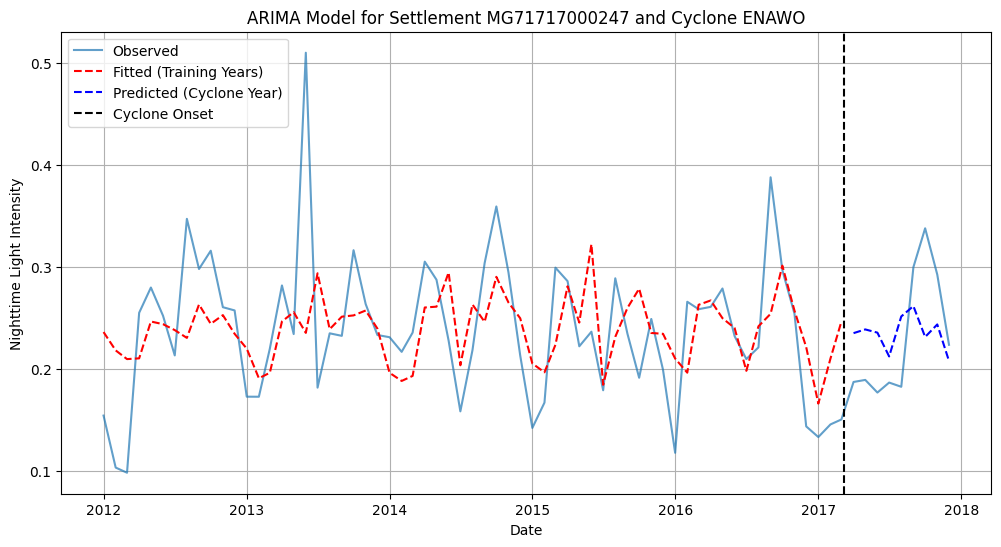

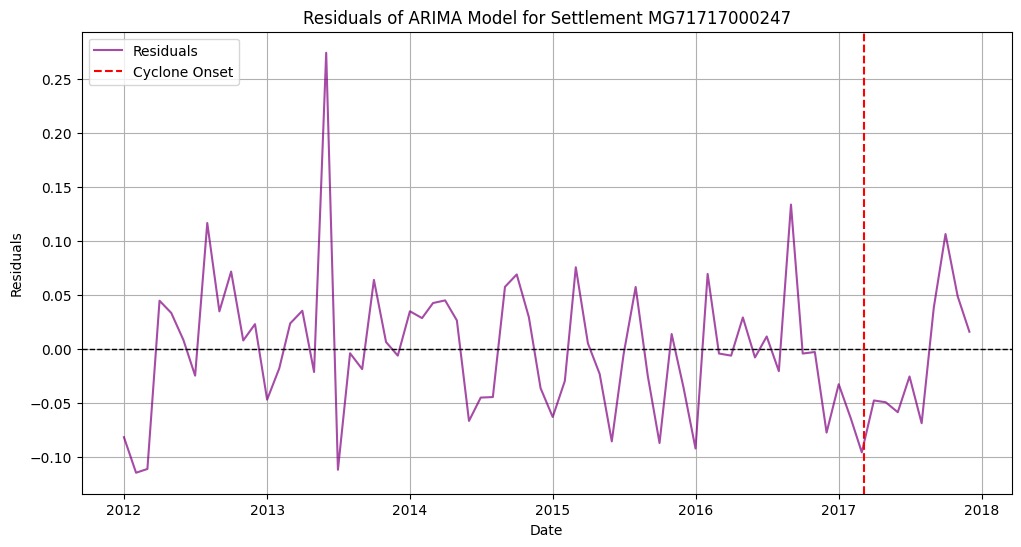

In [57]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from concurrent.futures import ThreadPoolExecutor, TimeoutError

# Path to your data directory
belmontdir = "C:/Users/Nazia/Documents/OSU/Belmont/PlotData/"
doyNTL_allgrid3 = "allNTL_allgrid3_props.csv"  # GAP-FILLED data file

# Load and preprocess the settlement data
df = pd.read_csv(belmontdir + doyNTL_allgrid3)
df['YYYY_MM_DD'] = pd.to_datetime(df['YYYY_MM_DD'], errors='coerce')
df.set_index('YYYY_MM_DD', inplace=True)

# Validate and clean the NTLmean column
df['NTLmean'] = pd.to_numeric(df['NTLmean'], errors='coerce')
df['NTLmean'] = df['NTLmean'].fillna(0)

# Load and preprocess the cyclone track data
cyclone_track_gdf = gpd.read_file(belmontdir + "merged_jtwc_updated.shp")
landfall_df = cyclone_track_gdf[['constant', 'datetime']].rename(
    columns={'constant': 'Cyclone', 'datetime': 'Landfall_DateTime'}
)
landfall_df['Landfall_DateTime'] = pd.to_datetime(landfall_df['Landfall_DateTime'])
landfall_df['Cyclone'] = landfall_df['Cyclone'].str.upper()

# Select the cyclone and settlement of interest
cyclone_name = 'ENAWO'
grid3 = 'MG71717000247'

# Filter cyclone landfall date
try:
    cyclone_onset = landfall_df.loc[landfall_df['Cyclone'] == cyclone_name, 'Landfall_DateTime'].iloc[0]
except IndexError:
    print(f"Cyclone {cyclone_name} not found in the dataset.")
    exit()

# Add ITS variables to the dataset
df['Step'] = (df.index >= cyclone_onset).astype(int)
df['Ramp'] = (df.index - cyclone_onset).days
df['Ramp'] = df['Ramp'].clip(lower=0)  # Clip negative values to 0

# Filter data for the specific settlement
its_data = df[df['settl_pcod'] == grid3]

# Ensure at least two years of data for yearly seasonality
start_date = its_data.index.min()
end_date = its_data.index.max()

if (end_date - start_date).days < 730:  # Less than 2 years of data
    print("Insufficient data for yearly seasonality. Extend the data range.")
    exit()

# Downsample numeric data to monthly frequency
numeric_columns = its_data[['NTLmean']]  # Only resample the NTLmean column
numeric_resampled = numeric_columns.resample('MS').mean()  # Monthly start frequency

# Recalculate or align Step and Ramp with resampled index
numeric_resampled['Step'] = (numeric_resampled.index >= cyclone_onset).astype(int)
numeric_resampled['Ramp'] = (numeric_resampled.index - cyclone_onset).days
numeric_resampled['Ramp'] = numeric_resampled['Ramp'].clip(lower=0)

# Filter training data to include only years before the cyclone year
training_data = numeric_resampled[numeric_resampled.index < cyclone_onset]

# Extract the list of training years
training_years = training_data.index.year.unique()

# Print the years used for training
print("\nYears used for model training (before cyclone onset):")
print(sorted(training_years))

# Adjust seasonal period for yearly seasonality
seasonal_period = 12  # Annual seasonality for monthly data

# Define the ARIMA fitting function
def fit_arima():
    return auto_arima(
        training_data['NTLmean'],  # Use filtered training data
        seasonal=True,
        m=seasonal_period,
        exogenous=training_data[['Step', 'Ramp']],  # Use Step and Ramp from filtered data
        stepwise=True,
        max_order=10,  # Increase search space for better seasonal fit
        start_p=0, max_p=2,  # Start with small values
        start_q=0, max_q=2,
        start_P=0, max_P=2,
        start_Q=0, max_Q=2
    )

# Fit the ARIMA model
model = None
with ThreadPoolExecutor() as executor:
    future = executor.submit(fit_arima)
    try:
        model = future.result(timeout=300)  # Timeout set to 5 minutes
    except TimeoutError:
        print("ARIMA fitting timed out.")
        exit()
    except ValueError as e:
        print(f"ARIMA fitting error: {e}")
        exit()

if model:
    # Predict fitted values for the entire dataset
    fitted_values = model.predict_in_sample(
        exogenous=numeric_resampled[['Step', 'Ramp']]
    )
    numeric_resampled['Fitted'] = fitted_values

    # Predict for the cyclone year
    cyclone_year_data = numeric_resampled[numeric_resampled.index.year == cyclone_onset.year]
    if not cyclone_year_data.empty:
        try:
            predictions_cyclone_year = model.predict(
                n_periods=len(cyclone_year_data),
                exogenous=cyclone_year_data[['Step', 'Ramp']]
            )

            # Align predictions with the cyclone year datetime index
            aligned_predictions = pd.Series(
                predictions_cyclone_year,
                index=pd.date_range(
                    start=cyclone_year_data.index[0],
                    periods=len(predictions_cyclone_year),
                    freq='MS'
                )
            )
            numeric_resampled.loc[aligned_predictions.index, 'Predicted'] = aligned_predictions

            # Filter data for plotting up to the cyclone year
            plot_data = numeric_resampled[numeric_resampled.index.year <= cyclone_onset.year]

            # Plot observed, fitted, and predicted values
            plt.figure(figsize=(12, 6))
            plt.plot(plot_data.index, plot_data['NTLmean'], label='Observed', alpha=0.7)
            plt.plot(plot_data.index, plot_data['Fitted'], label='Fitted (Training Years)', linestyle='--', color='red')
            plt.plot(aligned_predictions.index, aligned_predictions, label='Predicted (Cyclone Year)', linestyle='--', color='blue')
            plt.axvline(cyclone_onset, color='black', linestyle='--', label='Cyclone Onset')
            plt.title(f"ARIMA Model for Settlement {grid3} and Cyclone {cyclone_name}")
            plt.xlabel("Date")
            plt.ylabel("Nighttime Light Intensity")
            plt.legend()
            plt.grid(True)
            plt.show()

        except Exception as e:
            print(f"Error during prediction for cyclone year: {e}")
            exit()
else:
    print("ARIMA fitting failed. Please check your data and parameters.")
    exit()

# Calculate residuals
numeric_resampled['Residuals'] = None  # Initialize Residuals column

# Residuals for training years (using Fitted values)
training_mask = numeric_resampled.index < cyclone_onset
numeric_resampled.loc[training_mask, 'Residuals'] = (
    numeric_resampled.loc[training_mask, 'NTLmean']
    - numeric_resampled.loc[training_mask, 'Fitted']
)

# Residuals for the cyclone year (using Predicted values)
cyclone_mask = numeric_resampled.index >= cyclone_onset
numeric_resampled.loc[cyclone_mask, 'Residuals'] = (
    numeric_resampled.loc[cyclone_mask, 'NTLmean']
    - numeric_resampled.loc[cyclone_mask, 'Predicted']
)

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(numeric_resampled.index, numeric_resampled['Residuals'], label='Residuals', color='purple', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Horizontal line at zero
plt.axvline(cyclone_onset, color='red', linestyle='--', label='Cyclone Onset')
plt.title(f"Residuals of ARIMA Model for Settlement {grid3}")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.grid(True)
plt.show()


In [49]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from concurrent.futures import ThreadPoolExecutor, TimeoutError

# Path to your data directory
belmontdir = "C:/Users/Nazia/Documents/OSU/Belmont/PlotData/"
doyNTL_allgrid3 = "allNTL_allgrid3_props.csv"  # GAP-FILLED data file

# Load and preprocess the settlement data
df = pd.read_csv(belmontdir + doyNTL_allgrid3)
df['YYYY_MM_DD'] = pd.to_datetime(df['YYYY_MM_DD'], errors='coerce')
df.set_index('YYYY_MM_DD', inplace=True)

# Validate and clean the NTLmean column
df['NTLmean'] = pd.to_numeric(df['NTLmean'], errors='coerce')
df['NTLmean'] = df['NTLmean'].fillna(0)

# Load and preprocess the cyclone track data
cyclone_track_gdf = gpd.read_file(belmontdir + "merged_jtwc_updated.shp")
landfall_df = cyclone_track_gdf[['constant', 'datetime']].rename(
    columns={'constant': 'Cyclone', 'datetime': 'Landfall_DateTime'}
)
landfall_df['Landfall_DateTime'] = pd.to_datetime(landfall_df['Landfall_DateTime'])
landfall_df['Cyclone'] = landfall_df['Cyclone'].str.upper()

# Define the cyclone of interest
cyclone_name = 'ENAWO'

# Settlement list to iterate through
settlements = [
    "MG71717000247", "MG71718000051", "MG71718000049", "MG71000000001",
    "MG71713000207", "MG71713000173", "MG71713000089", "MG44417000001", "MG71713000135"
]

# Cyclone onset date
try:
    cyclone_onset = landfall_df.loc[landfall_df['Cyclone'] == cyclone_name, 'Landfall_DateTime'].iloc[0]
except IndexError:
    print(f"Cyclone {cyclone_name} not found in the dataset.")
    exit()



Processing settlement: MG71717000247


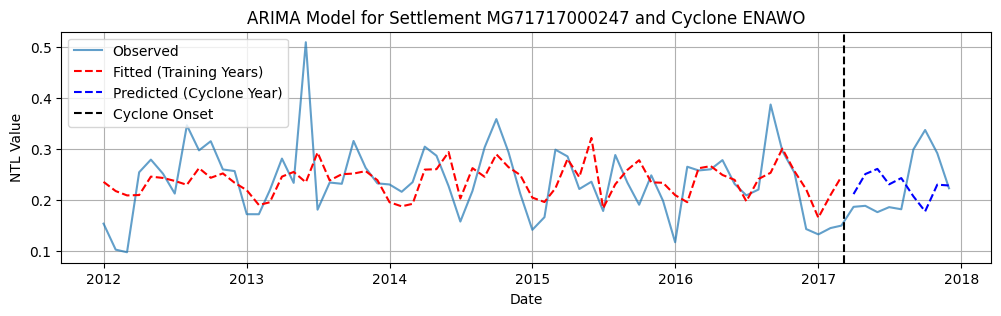

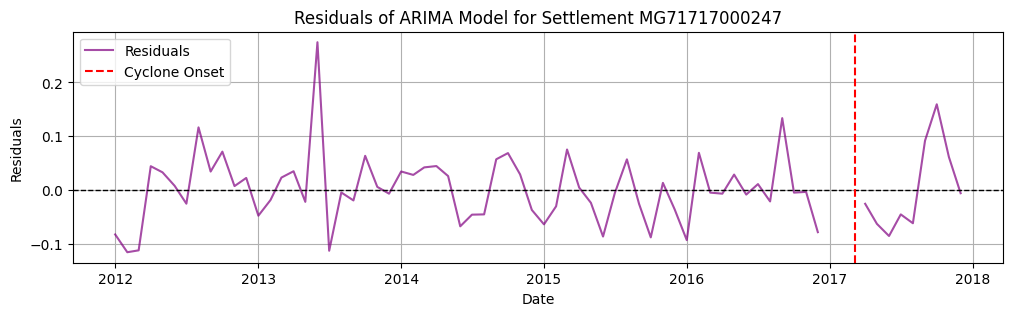


Processing settlement: MG71718000051


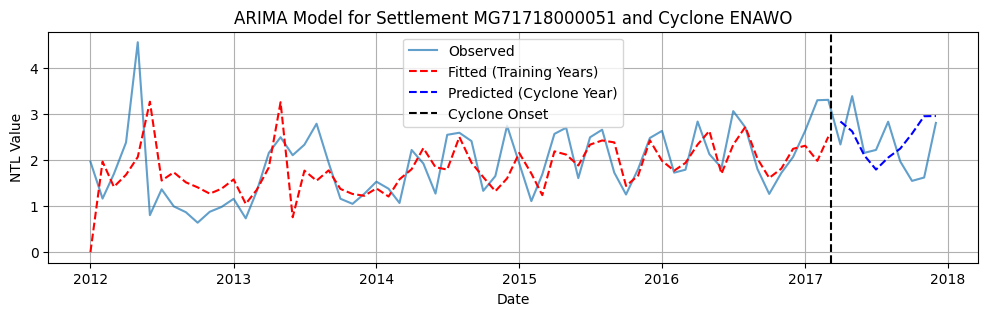

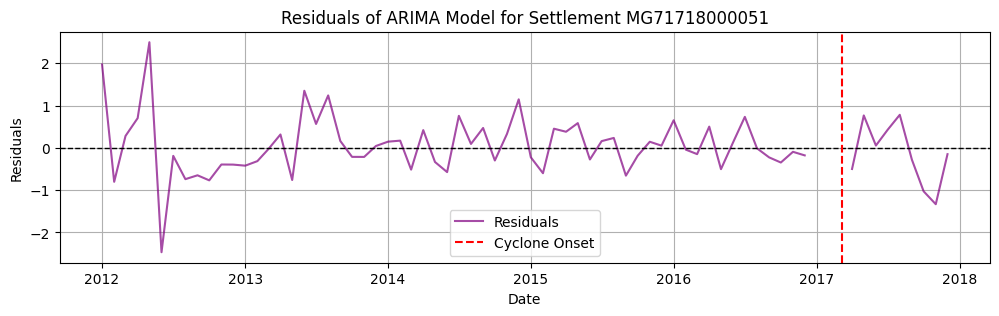


Processing settlement: MG71718000049


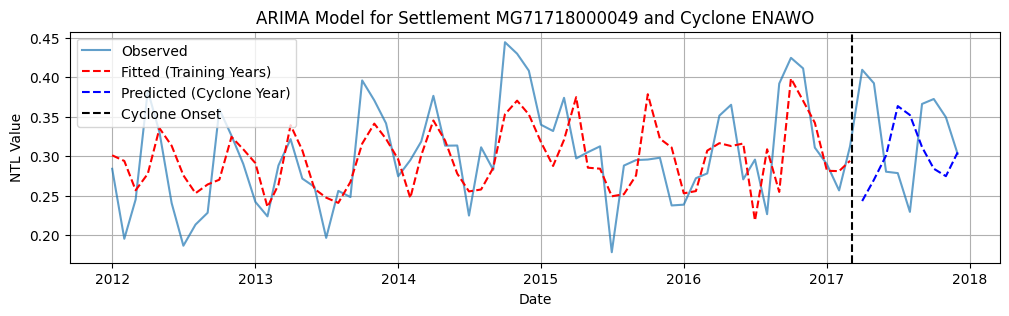

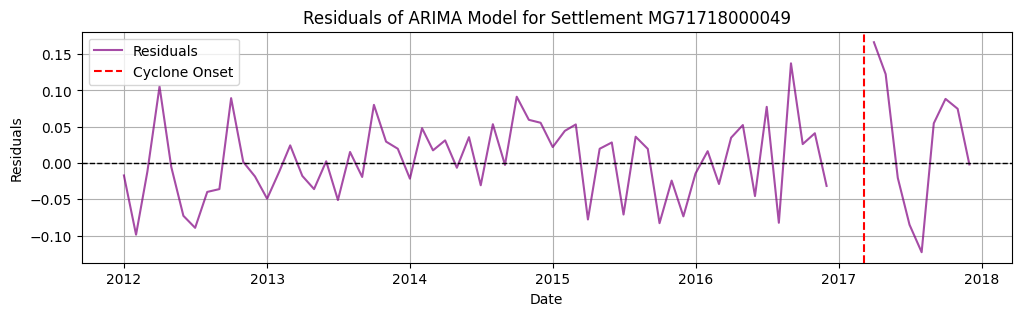


Processing settlement: MG71000000001


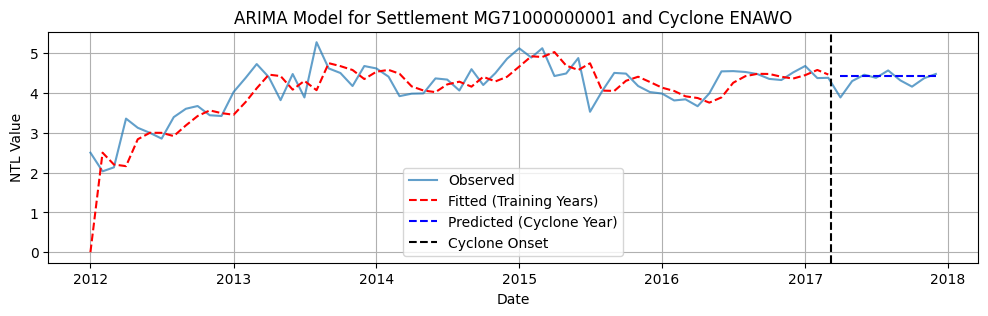

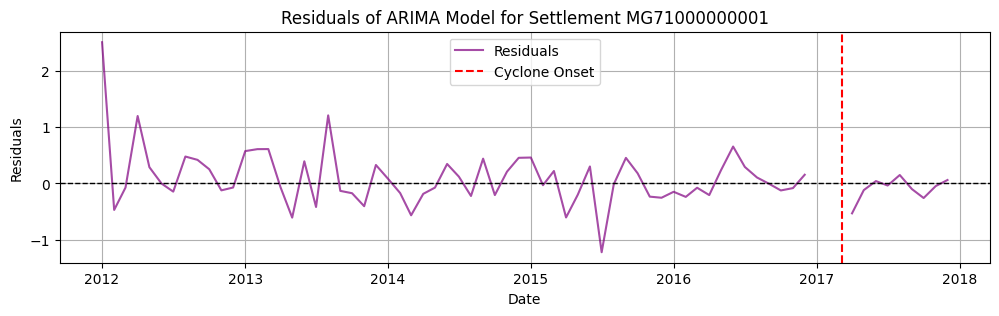


Processing settlement: MG71713000207


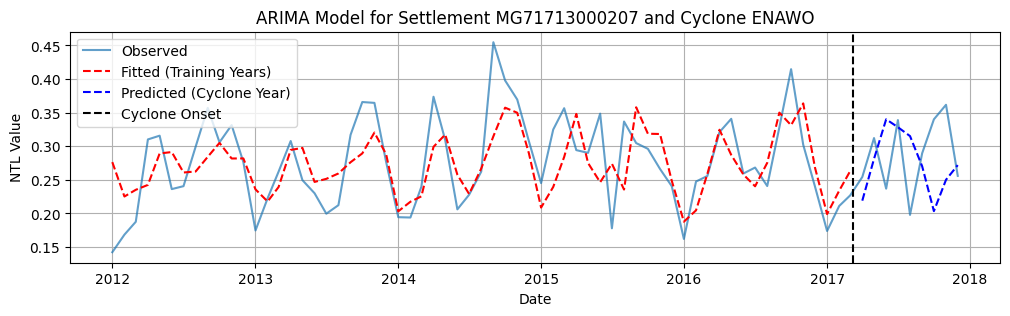

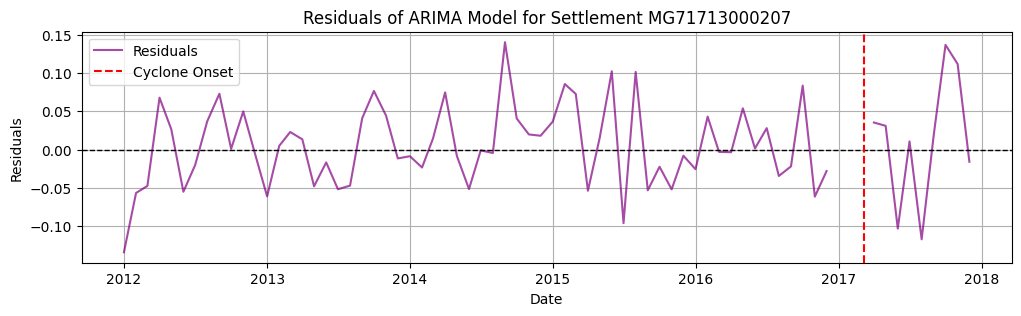


Processing settlement: MG71713000173


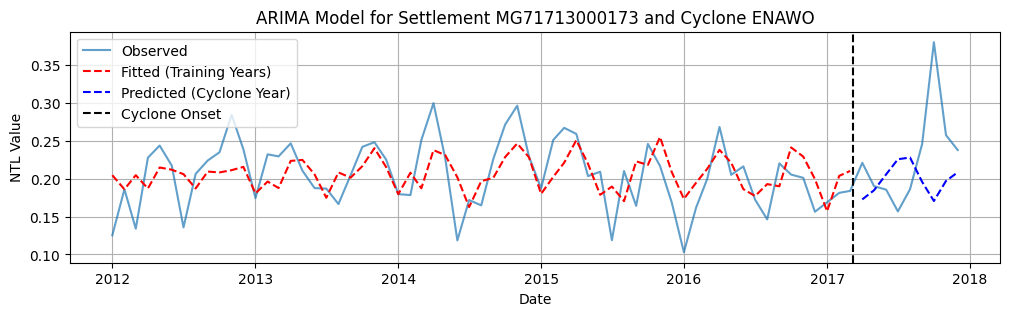

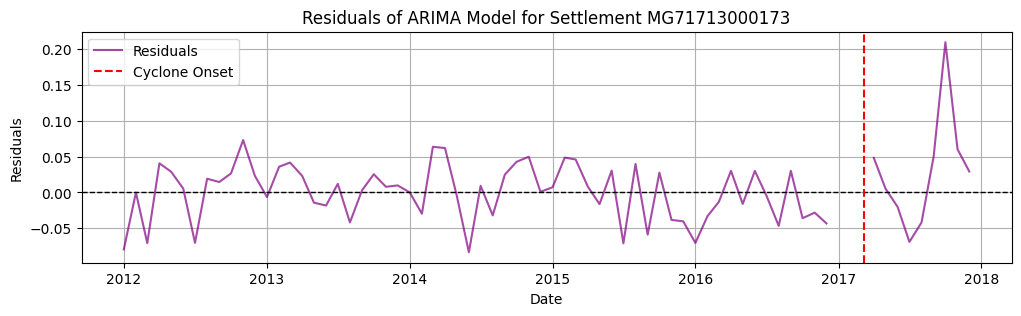


Processing settlement: MG71713000089


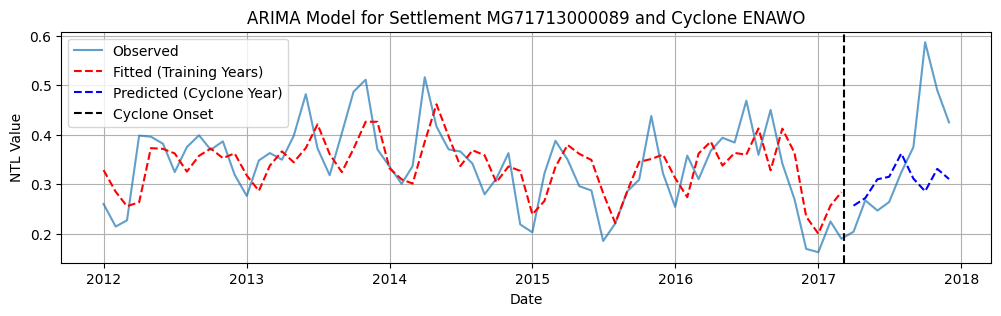

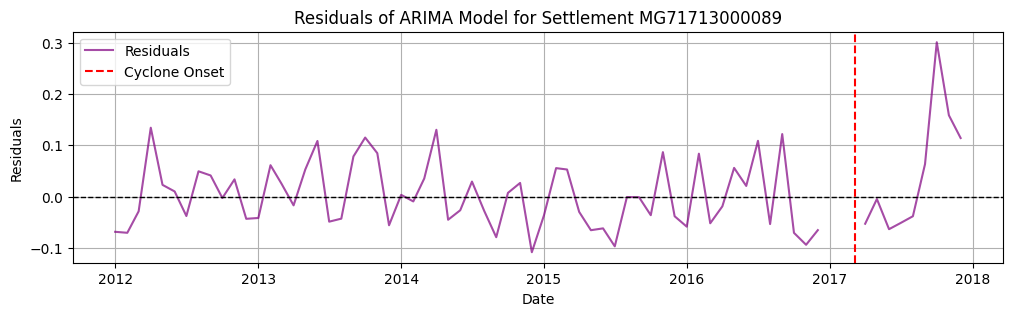


Processing settlement: MG44417000001


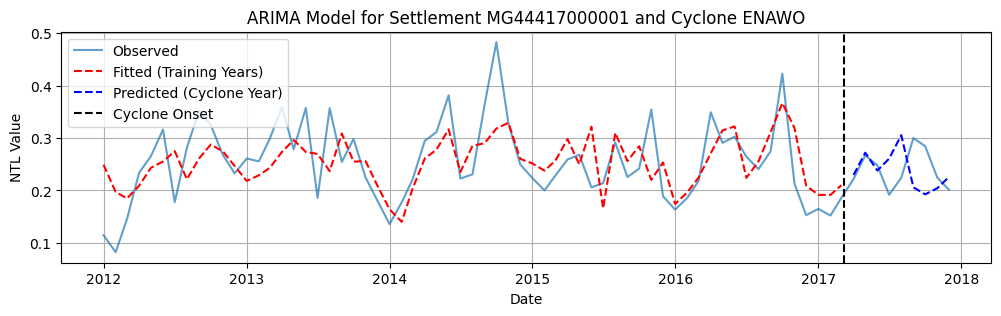

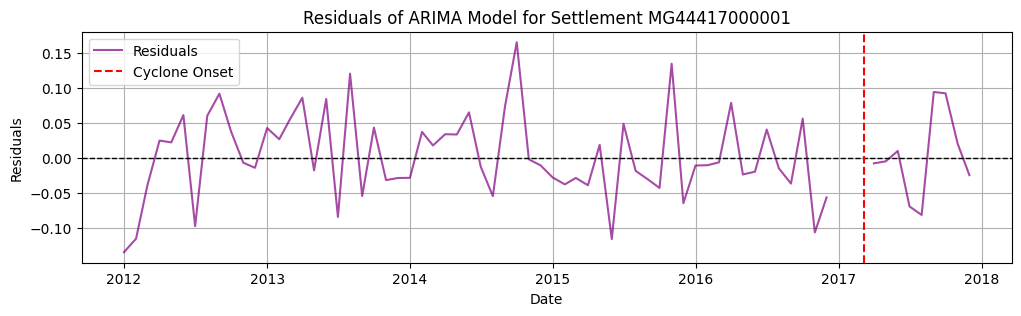


Processing settlement: MG71713000135


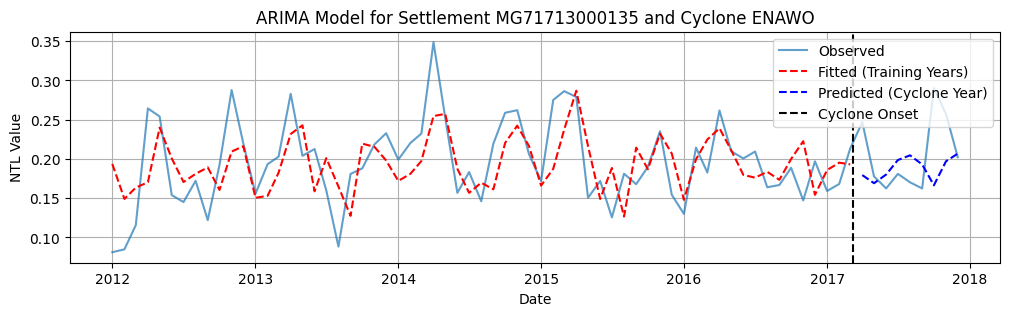

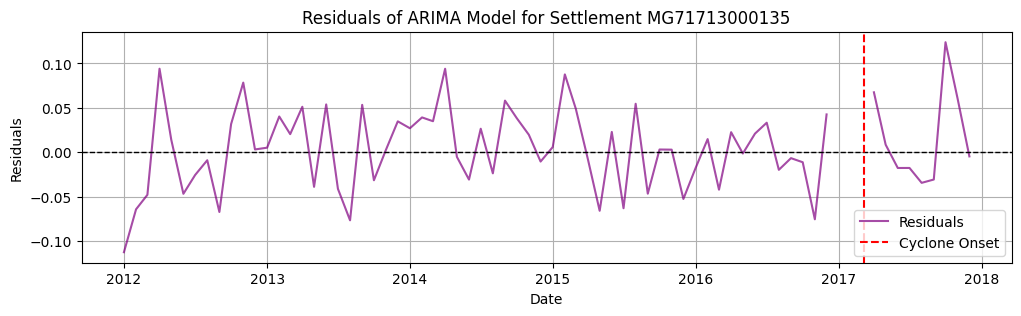

In [52]:
# Function to process and plot for each settlement
def process_settlement(settlement_id):
    global df, cyclone_onset

    # Filter data for the specific settlement
    its_data = df[df['settl_pcod'] == settlement_id]

    if its_data.empty:
        print(f"No data available for settlement {settlement_id}. Skipping...")
        return

    # Downsample numeric data to monthly frequency
    numeric_columns = its_data[['NTLmean']]
    numeric_resampled = numeric_columns.resample('MS').mean()

    # Recalculate Step and Ramp
    numeric_resampled['Step'] = (numeric_resampled.index >= cyclone_onset).astype(int)
    numeric_resampled['Ramp'] = (numeric_resampled.index - cyclone_onset).days
    numeric_resampled['Ramp'] = numeric_resampled['Ramp'].clip(lower=0)

    # Filter training data to include only years before the cyclone year
    training_data = numeric_resampled[numeric_resampled.index < cyclone_onset]

    if training_data.empty:
        print(f"Insufficient training data for settlement {settlement_id}. Skipping...")
        return

    # Fit ARIMA model
    def fit_arima():
        return auto_arima(
            training_data['NTLmean'],
            seasonal=True,
            m=12,  # Annual seasonality
            exogenous=training_data[['Step', 'Ramp']],
            stepwise=True,
            max_order=10,
            start_p=0, max_p=2,
            start_q=0, max_q=2,
            start_P=0, max_P=2,
            start_Q=0, max_Q=2
        )

    model = None
    with ThreadPoolExecutor() as executor:
        future = executor.submit(fit_arima)
        try:
            model = future.result(timeout=300)
        except TimeoutError:
            print(f"ARIMA fitting timed out for settlement {settlement_id}. Skipping...")
            return
        except ValueError as e:
            print(f"ARIMA fitting error for settlement {settlement_id}: {e}. Skipping...")
            return

    # Predict values
    fitted_values = model.predict_in_sample(exogenous=numeric_resampled[['Step', 'Ramp']])
    numeric_resampled['Fitted'] = fitted_values

    # Predict for the cyclone onset year
    cyclone_year = cyclone_onset.year
    cyclone_year_data = numeric_resampled[numeric_resampled.index.year == cyclone_year]
    if not cyclone_year_data.empty:
        predictions_cyclone_year = model.predict(
            n_periods=len(cyclone_year_data),
            exogenous=cyclone_year_data[['Step', 'Ramp']]
        )

        aligned_predictions = pd.Series(
            predictions_cyclone_year.values,
            index=cyclone_year_data.index
        )
        aligned_predictions = aligned_predictions[aligned_predictions.index >= cyclone_onset]

        numeric_resampled.loc[cyclone_year_data.index, 'Predicted'] = aligned_predictions

    # Calculate residuals
    numeric_resampled['Residuals'] = numeric_resampled['NTLmean'] - numeric_resampled['Fitted']
    numeric_resampled.loc[cyclone_year_data.index, 'Residuals'] = (
        numeric_resampled.loc[cyclone_year_data.index, 'NTLmean']
        - numeric_resampled.loc[cyclone_year_data.index, 'Predicted']
    )

    # Filter data for plotting to stop at the end of the cyclone year
    plot_data = numeric_resampled[numeric_resampled.index <= f"{cyclone_year}-12-31"]

    # Ensure 'Residuals' is present in `plot_data`
    if 'Residuals' not in plot_data.columns:
        print(f"Residuals not calculated for settlement {settlement_id}. Skipping...")
        return

    # Plot observed, fitted, and predicted values
    plt.figure(figsize=(12, 3))
    plt.plot(plot_data.index, plot_data['NTLmean'], label='Observed', alpha=0.7)
    plt.plot(plot_data.index, plot_data['Fitted'], label='Fitted (Training Years)', linestyle='--', color='red')
    if 'Predicted' in numeric_resampled.columns:
        plt.plot(aligned_predictions.index, aligned_predictions, label='Predicted (Cyclone Year)', linestyle='--', color='blue')
    plt.axvline(cyclone_onset, color='black', linestyle='--', label='Cyclone Onset')
    plt.title(f"ARIMA Model for Settlement {settlement_id} and Cyclone {cyclone_name}")
    plt.xlabel("Date")
    plt.ylabel("NTL Value")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot residuals, stopping at the end of the cyclone year
    plt.figure(figsize=(12, 3))
    plt.plot(plot_data.index, plot_data['Residuals'], label='Residuals', color='purple', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.axvline(cyclone_onset, color='red', linestyle='--', label='Cyclone Onset')
    plt.title(f"Residuals of ARIMA Model for Settlement {settlement_id}")
    plt.xlabel("Date")
    plt.ylabel("Residuals")
    plt.legend()
    plt.grid(True)
    plt.show()

# Iterate over settlements
for settlement_id in settlements:
    print(f"\nProcessing settlement: {settlement_id}")
    process_settlement(settlement_id)



Processing settlement: MG71717000247


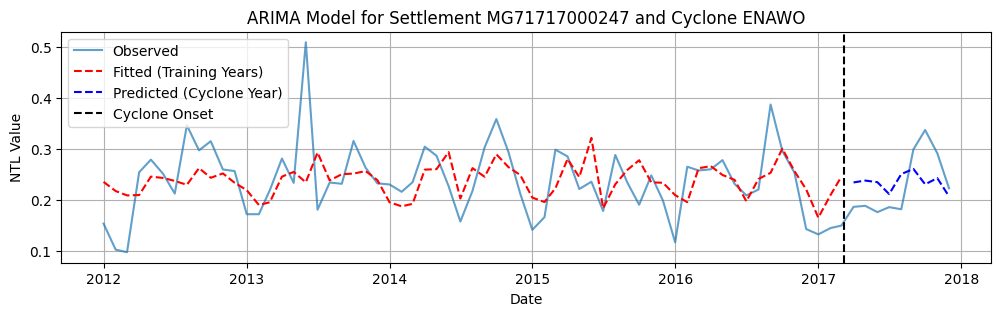

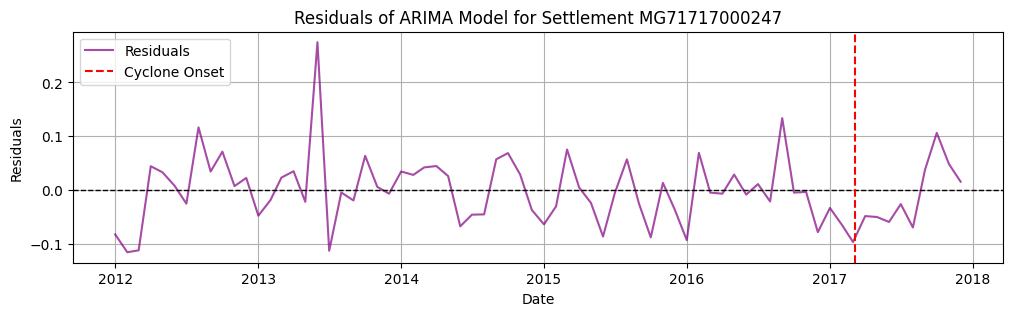


Processing settlement: MG71718000051


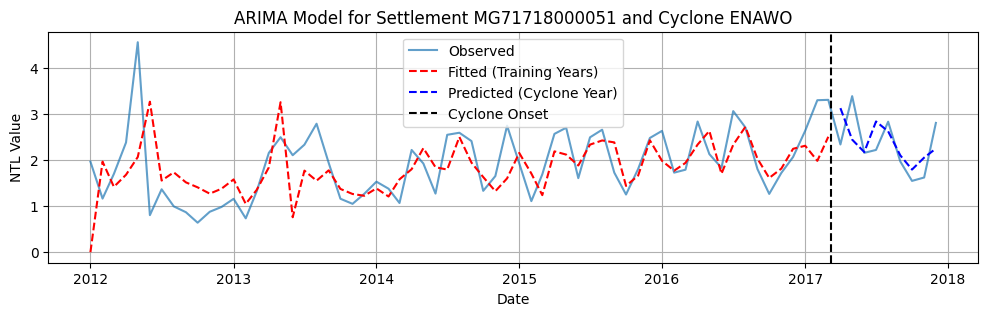

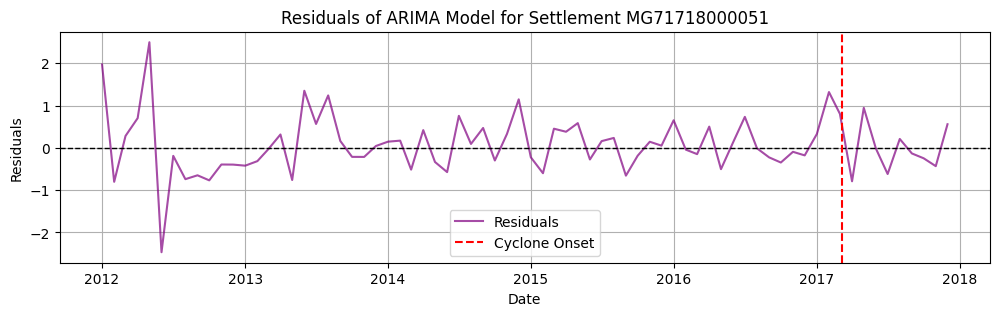


Processing settlement: MG71718000049


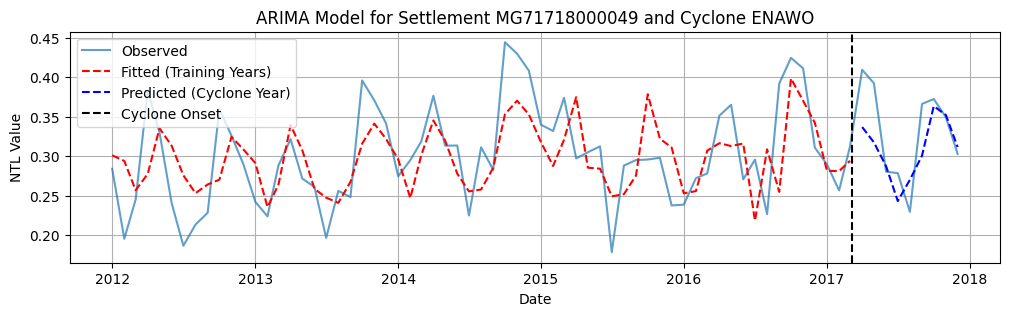

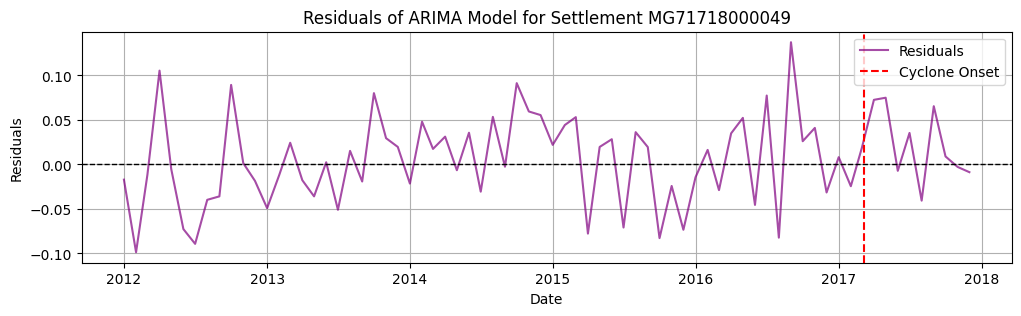


Processing settlement: MG71000000001


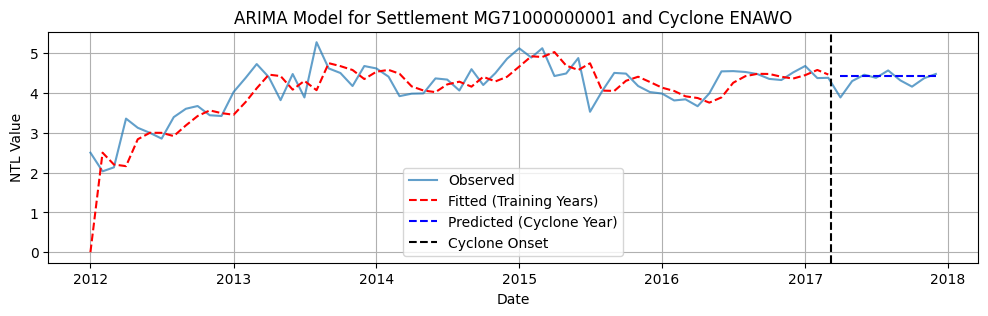

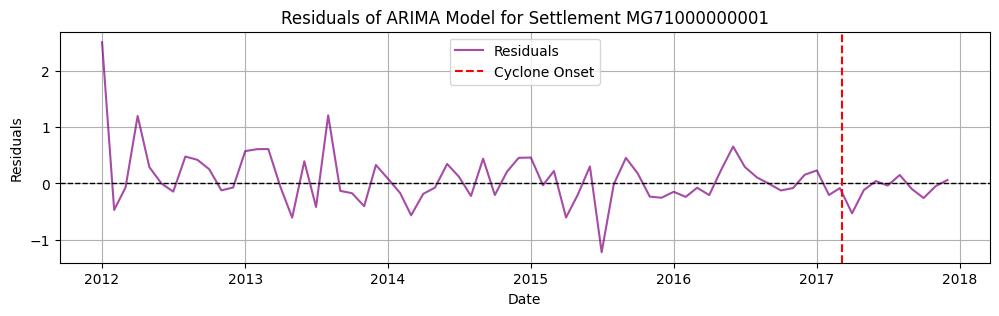


Processing settlement: MG71713000207


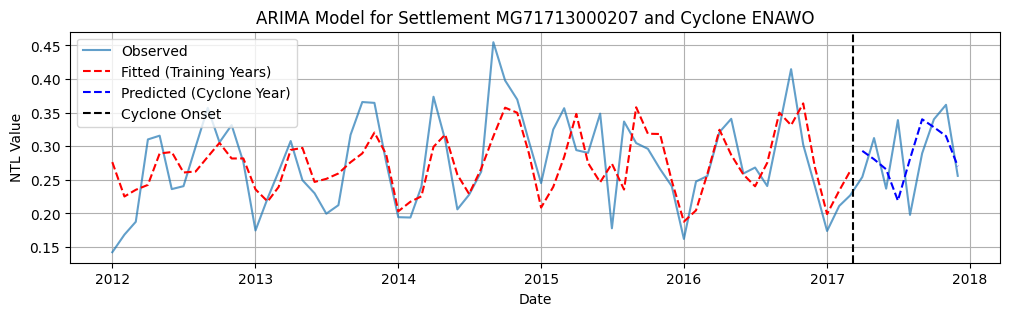

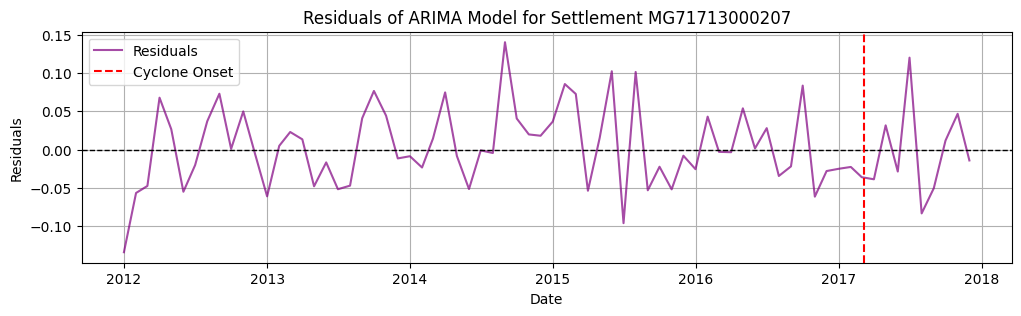


Processing settlement: MG71713000173


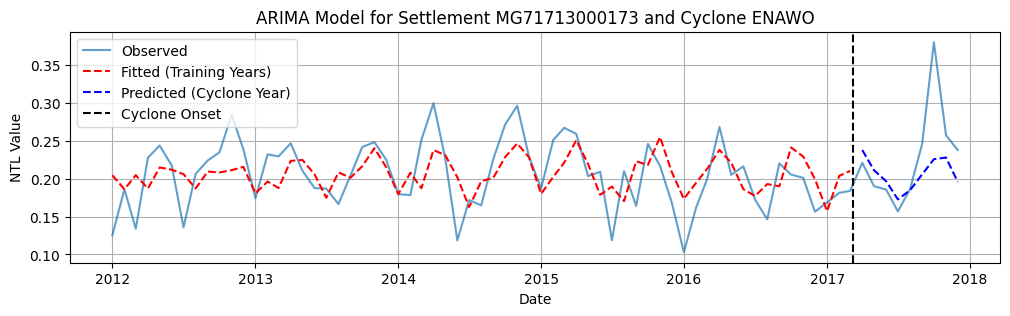

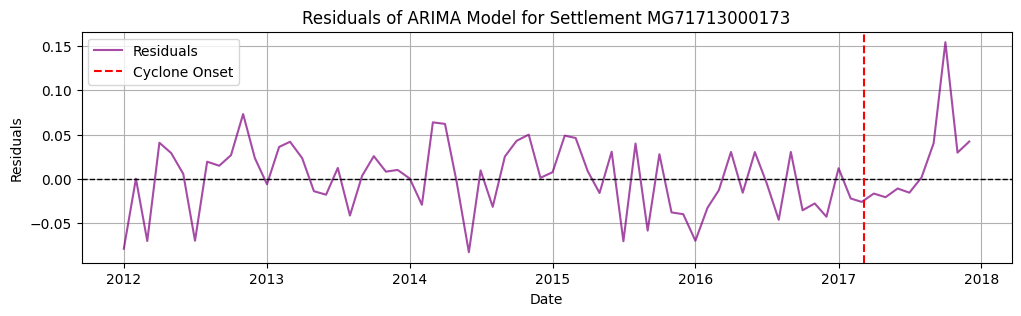


Processing settlement: MG71713000089


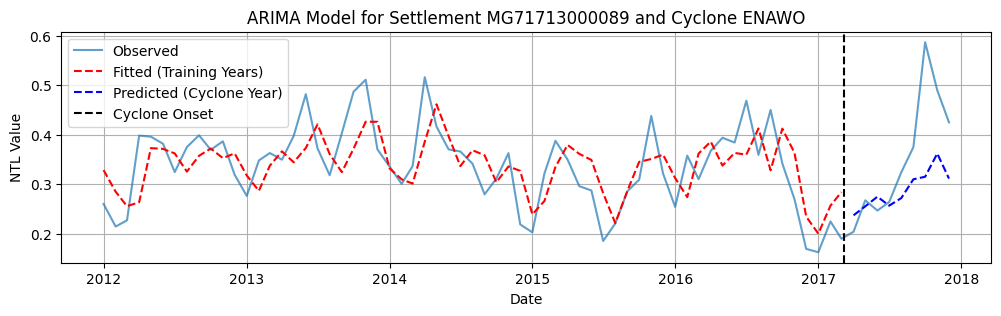

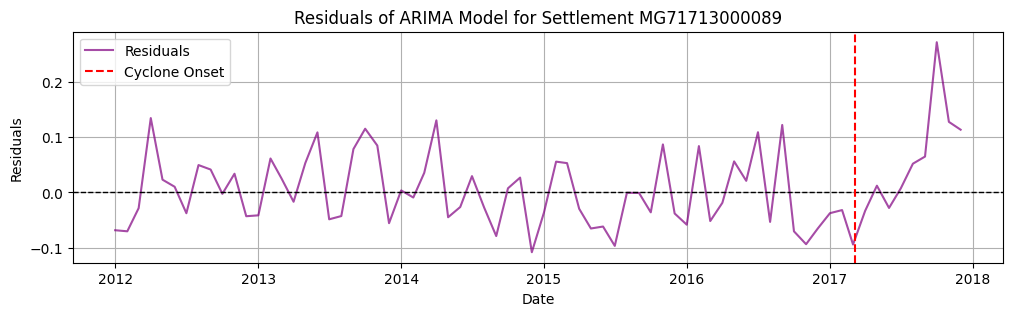


Processing settlement: MG44417000001


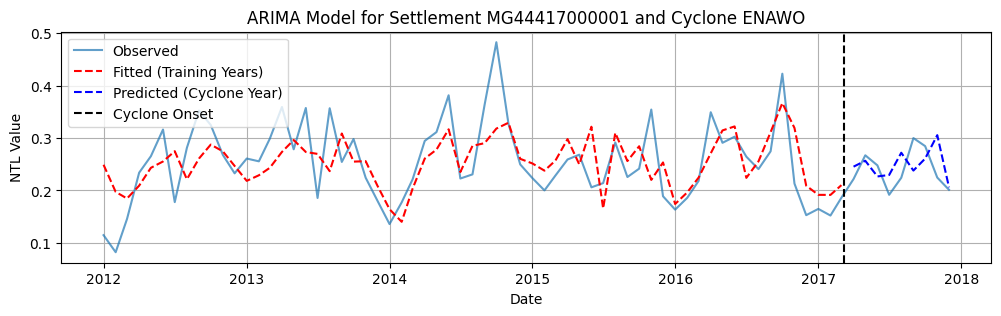

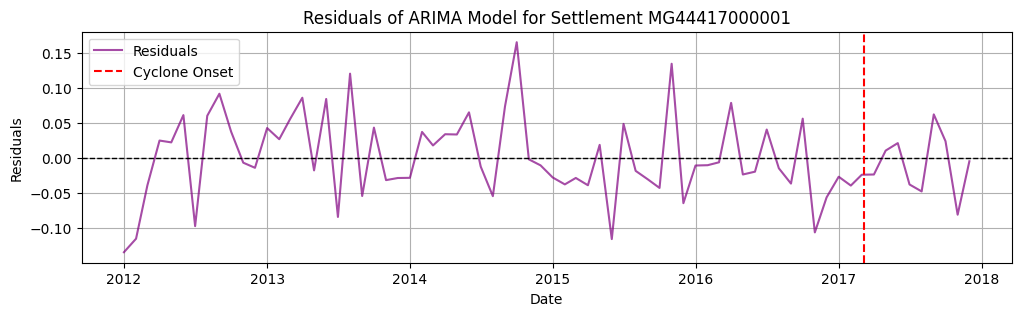


Processing settlement: MG71713000135


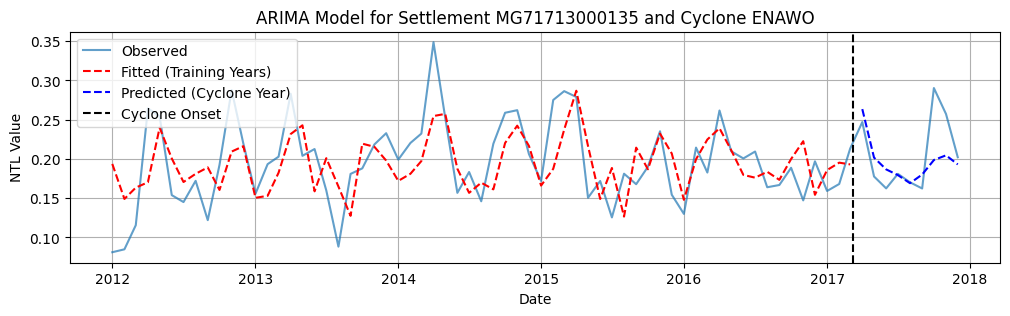

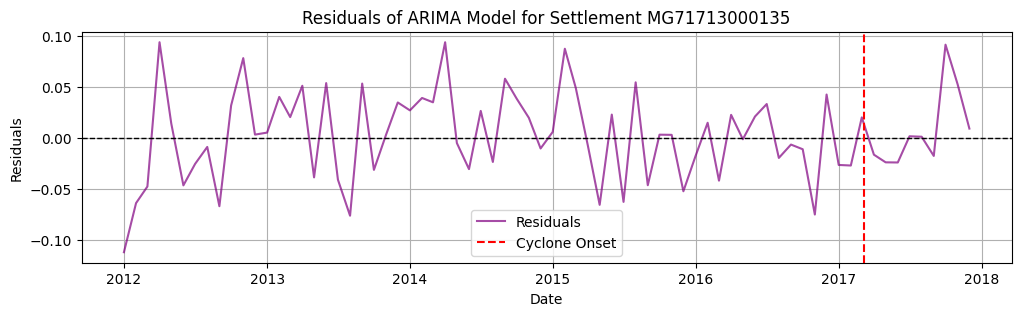

In [58]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from concurrent.futures import ThreadPoolExecutor, TimeoutError

# Path to your data directory
belmontdir = "C:/Users/Nazia/Documents/OSU/Belmont/PlotData/"
doyNTL_allgrid3 = "allNTL_allgrid3_props.csv"  # GAP-FILLED data file

# Load and preprocess the settlement data
df = pd.read_csv(belmontdir + doyNTL_allgrid3)
df['YYYY_MM_DD'] = pd.to_datetime(df['YYYY_MM_DD'], errors='coerce')
df.set_index('YYYY_MM_DD', inplace=True)

# Validate and clean the NTLmean column
df['NTLmean'] = pd.to_numeric(df['NTLmean'], errors='coerce')
df['NTLmean'] = df['NTLmean'].fillna(0)

# Load and preprocess the cyclone track data
cyclone_track_gdf = gpd.read_file(belmontdir + "merged_jtwc_updated.shp")
landfall_df = cyclone_track_gdf[['constant', 'datetime']].rename(
    columns={'constant': 'Cyclone', 'datetime': 'Landfall_DateTime'}
)
landfall_df['Landfall_DateTime'] = pd.to_datetime(landfall_df['Landfall_DateTime'])
landfall_df['Cyclone'] = landfall_df['Cyclone'].str.upper()

# Define the cyclone of interest
cyclone_name = 'ENAWO'

# Settlement list to iterate through
settlements = [
    "MG71717000247", "MG71718000051", "MG71718000049", "MG71000000001",
    "MG71713000207", "MG71713000173", "MG71713000089", "MG44417000001", "MG71713000135"
]

# Cyclone onset date
try:
    cyclone_onset = landfall_df.loc[landfall_df['Cyclone'] == cyclone_name, 'Landfall_DateTime'].iloc[0]
except IndexError:
    print(f"Cyclone {cyclone_name} not found in the dataset.")
    exit()

def process_settlement(settlement_id):
    global df, cyclone_onset

    # Filter data for the specific settlement
    its_data = df[df['settl_pcod'] == settlement_id]

    if its_data.empty:
        print(f"No data available for settlement {settlement_id}. Skipping...")
        return

    # Downsample numeric data to monthly frequency
    numeric_columns = its_data[['NTLmean']]
    numeric_resampled = numeric_columns.resample('MS').mean()

    # Recalculate Step and Ramp
    numeric_resampled['Step'] = (numeric_resampled.index >= cyclone_onset).astype(int)
    numeric_resampled['Ramp'] = (numeric_resampled.index - cyclone_onset).days
    numeric_resampled['Ramp'] = numeric_resampled['Ramp'].clip(lower=0)

    # Filter training data to include only years before the cyclone year
    training_data = numeric_resampled[numeric_resampled.index < cyclone_onset]

    if training_data.empty:
        print(f"Insufficient training data for settlement {settlement_id}. Skipping...")
        return

    # Fit ARIMA model
    def fit_arima():
        return auto_arima(
            training_data['NTLmean'],
            seasonal=True,
            m=12,  # Annual seasonality
            exogenous=training_data[['Step', 'Ramp']],
            stepwise=True,
            max_order=10,
            start_p=0, max_p=2,
            start_q=0, max_q=2,
            start_P=0, max_P=2,
            start_Q=0, max_Q=2
        )

    model = None
    with ThreadPoolExecutor() as executor:
        future = executor.submit(fit_arima)
        try:
            model = future.result(timeout=300)
        except TimeoutError:
            print(f"ARIMA fitting timed out for settlement {settlement_id}. Skipping...")
            return
        except ValueError as e:
            print(f"ARIMA fitting error for settlement {settlement_id}: {e}. Skipping...")
            return

    # Predict values
    fitted_values = model.predict_in_sample(exogenous=numeric_resampled[['Step', 'Ramp']])
    numeric_resampled['Fitted'] = fitted_values

    # Predict for the cyclone onset year
    cyclone_year = cyclone_onset.year
    cyclone_year_data = numeric_resampled[numeric_resampled.index.year == cyclone_year]
    if not cyclone_year_data.empty:
        predictions_cyclone_year = model.predict(
            n_periods=len(cyclone_year_data),
            exogenous=cyclone_year_data[['Step', 'Ramp']]
        )

        aligned_predictions = pd.Series(
            predictions_cyclone_year,
            index=cyclone_year_data.index
        )
        aligned_predictions = aligned_predictions[aligned_predictions.index >= cyclone_onset]

        numeric_resampled.loc[cyclone_year_data.index, 'Predicted'] = aligned_predictions

    # Calculate residuals
    numeric_resampled['Residuals'] = None

    # Residuals for training years
    training_mask = numeric_resampled.index < cyclone_onset
    numeric_resampled.loc[training_mask, 'Residuals'] = (
        numeric_resampled.loc[training_mask, 'NTLmean']
        - numeric_resampled.loc[training_mask, 'Fitted']
    )

    # Residuals for cyclone year
    cyclone_mask = numeric_resampled.index >= cyclone_onset
    numeric_resampled.loc[cyclone_mask, 'Residuals'] = (
        numeric_resampled.loc[cyclone_mask, 'NTLmean']
        - numeric_resampled.loc[cyclone_mask, 'Predicted']
    )

    # Filter data for plotting to stop at the end of the cyclone year
    plot_data = numeric_resampled[numeric_resampled.index <= f"{cyclone_year}-12-31"]

    # Plot observed, fitted, and predicted values
    plt.figure(figsize=(12, 3))
    plt.plot(plot_data.index, plot_data['NTLmean'], label='Observed', alpha=0.7)
    plt.plot(plot_data.index, plot_data['Fitted'], label='Fitted (Training Years)', linestyle='--', color='red')
    if 'Predicted' in numeric_resampled.columns:
        plt.plot(aligned_predictions.index, aligned_predictions, label='Predicted (Cyclone Year)', linestyle='--', color='blue')
    plt.axvline(cyclone_onset, color='black', linestyle='--', label='Cyclone Onset')
    plt.title(f"ARIMA Model for Settlement {settlement_id} and Cyclone {cyclone_name}")
    plt.xlabel("Date")
    plt.ylabel("NTL Value")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot residuals
    plt.figure(figsize=(12, 3))
    plt.plot(plot_data.index, plot_data['Residuals'], label='Residuals', color='purple', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.axvline(cyclone_onset, color='red', linestyle='--', label='Cyclone Onset')
    plt.title(f"Residuals of ARIMA Model for Settlement {settlement_id}")
    plt.xlabel("Date")
    plt.ylabel("Residuals")
    plt.legend()
    plt.grid(True)
    plt.show()

# Iterate over settlements
for settlement_id in settlements:
    print(f"\nProcessing settlement: {settlement_id}")
    process_settlement(settlement_id)
